# Fingerprint distances distribution

In this notebook, we investigate the ranges of fingerprint distances for different feature weighting schemes.
Feature weighting schemes are denoted as follows: 

> physicochemical/distances/moments

- 100: Include only bits for physicochemical features (_physicochemical_)
- 010: Include only bits for spatial distances features (_distances_)
- 001: Include only bits for moments of spatial distances features (_moments_)
- 110: Include only bits for physicochemical and distances (1:1)
- 101: Include only bits for physicochemical and moments (1:1)
- 011: Include only bits for distances and moments (1:1)
- 111: Include all bits equally weighted by physicochemical, distances, and moments
- 15: Include all bits equally by bit

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
from kissim.comparison import FingerprintDistanceGenerator

from src.paths import PATH_RESULTS

In [3]:
HERE = Path(_dh[-1])  # noqa: F821
DATA = PATH_RESULTS / "dfg_in"

In [4]:
plt.style.use("seaborn")

In [5]:
%%time

weights = ["100", "010", "001", "101", "110", "101", "011", "111", "15"]
distances = {}
for weight in weights:
    if weight == "15":
        file = "fingerprint_distances.csv.bz2"
    else:
        file = f"fingerprint_distances_{weight}.csv.bz2"
    fingerprint_distance_generator = FingerprintDistanceGenerator.from_csv(DATA / file)
    dist_df = fingerprint_distance_generator.data
    print(f"{file} - Number of comparisons: {len(dist_df)}")
    distances[weight] = dist_df["distance"]

fingerprint_distances_100.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances_010.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances_001.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances_101.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances_110.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances_101.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances_011.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances_111.csv.bz2 - Number of comparisons: 8452216
fingerprint_distances.csv.bz2 - Number of comparisons: 8452216
CPU times: user 2min 50s, sys: 3.76 s, total: 2min 53s
Wall time: 2min 54s


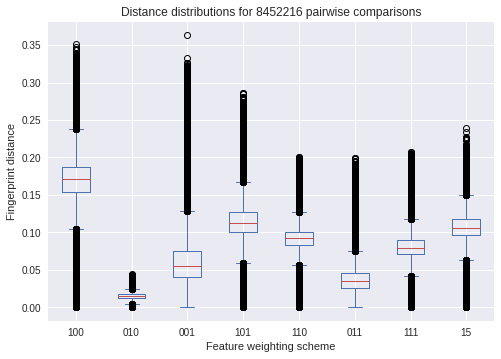

In [6]:
fig, ax = plt.subplots(1, 1)
pd.DataFrame(distances).plot(
    kind="box",
    ax=ax,
    title=f"Distance distributions for {distances['111'].shape[0]} pairwise comparisons",
)
ax.set_xlabel("Feature weighting scheme")
ax.set_ylabel("Fingerprint distance");